In [1]:
import matplotlib
matplotlib.use('Agg')
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

import numpy as np
import matplotlib.pyplot as plt
from stable_baselines.results_plotter import load_results, ts2xy, plot_curves, plot_results
from utils import plot_utils
from utils import utils
from utils import plot
%matplotlib inline

# set up matplotlib

plt.ion()

/opt/pyenv/versions/3.6.5/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [66]:
results = utils.load_group_results('logs/', verbose=True, mask='39-[1-5]0_[1-3]$')

successfully loaded logs/ppo2/LunarLanderContinuous-v2_39-10_1
successfully loaded logs/ppo2/LunarLanderContinuous-v2_39-10_2
successfully loaded logs/ppo2/LunarLanderContinuous-v2_39-10_3
loaded 3 results


(<Figure size 842.4x595.44 with 1 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0588860f98>]],
       dtype=object))

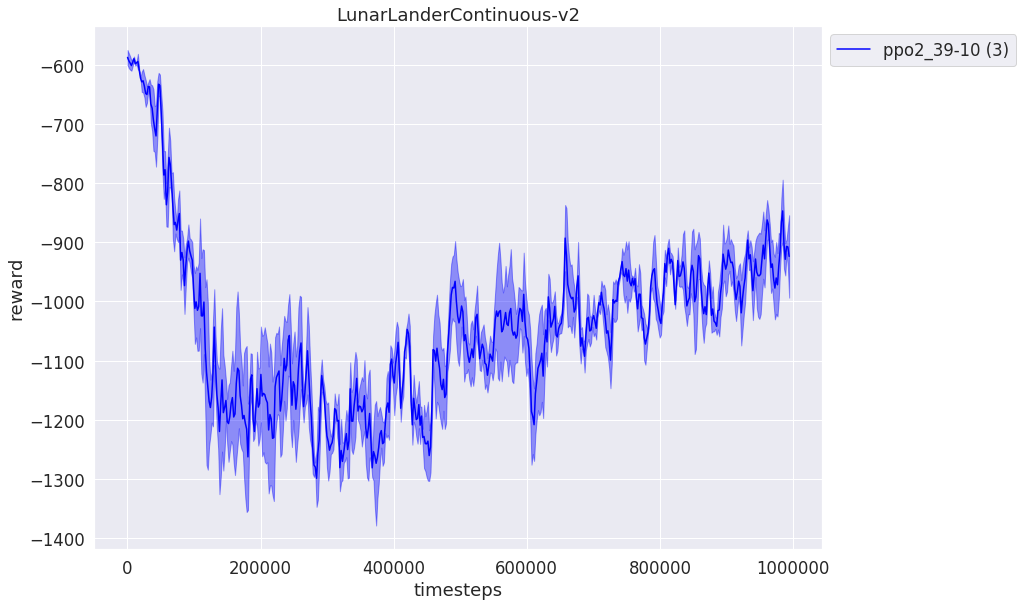

In [65]:
plot.plot_results(results, average_group=True, shaded_std=False, ybase=100, legend_outside=True, xaxis='timesteps')

(<Figure size 432x432 with 1 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d910eae48>]],
       dtype=object))

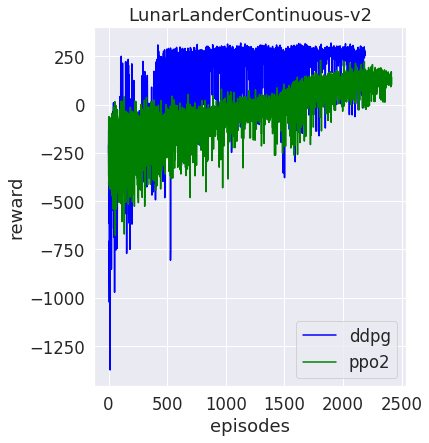

In [27]:
plot.plot_results(results)

LunarLanderContinuous-v2_2
LunarLanderContinuous-v2_3


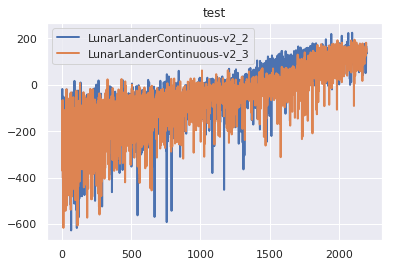

LunarLanderContinuous-v2_2
LunarLanderContinuous-v2_3


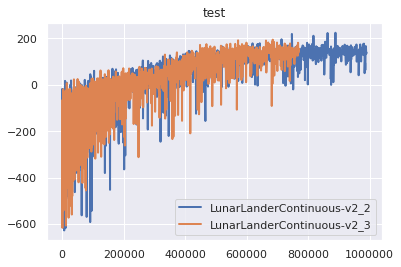

In [18]:
# from matplotlib.ticker import FuncFormatter
# import os
# import seaborn
# log_dirs = ['logs/ppo2/LunarLanderContinuous-v2_2/', 'logs/ppo2/LunarLanderContinuous-v2_3/']
# smooth = False
# title = 'test'

# results = []
# algos = []

# for folder in log_dirs:
#     timesteps = load_results(folder)
#     results.append(timesteps)
#     if folder.endswith('/'):
#         folder = folder[:-1]
#     algos.append(folder.split('/')[-1])


# min_timesteps = np.inf
# # 'walltime_hrs', 'episodes'
# for plot_type in ['episodes','timesteps']:
#     xy_list = []
#     for result in results:
#         x, y = ts2xy(result, plot_type)
#         if smooth:
#             x, y = smooth((x, y), window=50)
#         n_timesteps = x[-1]
#         if n_timesteps < min_timesteps:
#             min_timesteps = n_timesteps
#         xy_list.append((x, y))

#     fig = plt.figure(title)
#     for i, (x, y) in enumerate(xy_list):
#         print(algos[i])
#         plt.plot(x[:min_timesteps], y[:min_timesteps], label=algos[i], linewidth=2)
#     plt.title(title)
#     plt.legend()
#     if plot_type == 'timesteps':
#         if min_timesteps > 1e6:
#             formatter = FuncFormatter(millions)
#             plt.xlabel('Number of Timesteps')
#             fig.axes[0].xaxis.set_major_formatter(formatter)

#     plt.show()


# Playground (ignore the codes below)

In [29]:
import gym
env = gym.make('LunarLanderContinuous-v2')

In [4]:
env.reset()

array([ 0.00390415,  1.415803  ,  0.39543015,  0.21700495, -0.00451711,
       -0.08957083,  0.        ,  0.        ], dtype=float32)

In [7]:
vars(env)

{'env': <gym.envs.box2d.lunar_lander.LunarLanderContinuous at 0x7fef686f3dd8>,
 'action_space': Box(2,),
 'observation_space': Box(8,),
 'reward_range': (-inf, inf),
 'metadata': {'render.modes': ['human', 'rgb_array'],
  'video.frames_per_second': 50},
 'spec': EnvSpec(LunarLanderContinuous-v2),
 '_max_episode_seconds': None,
 '_max_episode_steps': 1000,
 '_elapsed_steps': 0,
 '_episode_started_at': None}

In [3]:
dir(env)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_elapsed_seconds',
 '_elapsed_steps',
 '_episode_started_at',
 '_max_episode_seconds',
 '_max_episode_steps',
 '_past_limit',
 'action_space',
 'class_name',
 'close',
 'compute_reward',
 'env',
 'metadata',
 'observation_space',
 'render',
 'reset',
 'reward_range',
 'seed',
 'spec',
 'step',
 'unwrapped']

In [10]:
import gym.envs.box2d.lunar_lander as l

In [43]:
env.__class__.env

In [20]:
globals()['MAIN_ENGINE_POWER']

KeyError: 'MAIN_ENGINE_POWER'

In [22]:
env.__setattr__()

TypeError:  expected 2 arguments, got 0

In [26]:
import inspect

In [70]:
pa = inspect.getfile(env.env.__class__)[:-3]

In [71]:
lis = pa.split('/')

In [73]:
lis = lis[lis.index('gym'):]

In [76]:
lis = ".".join(lis)

In [53]:
type(l)

module

In [54]:
import importlib

In [77]:
k = importlib.import_module(lis)

In [78]:
k

<module 'gym.envs.box2d.lunar_lander' from '/opt/pyenv/versions/3.6.5/lib/python3.6/site-packages/gym/envs/box2d/lunar_lander.py'>

In [59]:
l == k

True

In [50]:
vars(l)

{'__name__': 'gym.envs.box2d.lunar_lander',
 '__doc__': None,
 '__package__': 'gym.envs.box2d',
 '__loader__': <_frozen_importlib_external.SourceFileLoader at 0x7f3af40d3550>,
 '__spec__': ModuleSpec(name='gym.envs.box2d.lunar_lander', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7f3af40d3550>, origin='/opt/pyenv/versions/3.6.5/lib/python3.6/site-packages/gym/envs/box2d/lunar_lander.py'),
 '__file__': '/opt/pyenv/versions/3.6.5/lib/python3.6/site-packages/gym/envs/box2d/lunar_lander.py',
 '__cached__': '/opt/pyenv/versions/3.6.5/lib/python3.6/site-packages/gym/envs/box2d/__pycache__/lunar_lander.cpython-36.pyc',
 '__builtins__': {'__name__': 'builtins',
  '__doc__': "Built-in functions, exceptions, and other objects.\n\nNoteworthy: None is the `nil' object; Ellipsis represents `...' in slices.",
  '__package__': '',
  '__loader__': _frozen_importlib.BuiltinImporter,
  '__spec__': ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>),
  '__bu

In [52]:
vars(l)['MAIN_ENGINE_POWER'] = 100